In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from IPython.display import display, HTML

path = os.getcwd()
file_folder = os.path.join(path,'global_features')
years = [2017,2018,2019,2020]
list_data= []
df = pd.DataFrame()
for year in years:
    number_of_weeks = 0
    for csv_file in os.listdir(file_folder):
        if str(year) in csv_file[19:]:
            short_name = csv_file[19:]
            #print(short_name)
            csv_path = os.path.join(file_folder,csv_file)
            df_temp = pd.read_csv(csv_path)
            year = short_name[0:4]
            month = short_name[5:7]
            day =short_name[8:10]
            date = year + '-' + month + '-' + day
            #print(date)
            
            df_temp['date'] = date
            df_temp.date = pd.to_datetime(df_temp.date)
            df_temp.set_index(df_temp.date, inplace=True)
            df_temp.drop(columns=['date'], inplace=True)
            
            df = pd.concat([df, df_temp])
#print(list_data)

In [2]:
df.sort_index(inplace = True)

In [3]:
df.describe()

,Unnamed: 0,index,Position,Streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,37000.000000,37000.000000,37000.000000,3.700000e+04,37000.000000,37000.000000,37000.000000,37000.000000,37000.000000,37000.000000,37000.000000,37000.000000,37000.000000,37000.000000,37000.000000,37000.000000,37000.000000
mean,99.500000,100.500000,100.500000,8.218784e+06,0.700926,0.636308,5.387243,-6.043460,0.583973,0.116748,0.224921,0.007271,0.165526,0.497479,120.017605,3.979135,208430.503216
std,57.735085,57.735085,57.735085,5.844385e+06,0.131020,0.159975,3.690342,2.367391,0.492905,0.103126,0.230056,0.050904,0.121862,0.218155,29.270608,0.240941,40740.056108
min,0.000000,1.000000,1.000000,2.525159e+06,0.153000,0.027900,0.000000,-34.475000,0.000000,0.023200,0.000031,0.000000,0.019700,0.036000,46.718000,1.000000,30133.000000
25%,49.750000,50.750000,50.750000,4.773290e+06,0.624000,0.533000,1.000000,-7.175250,0.000000,0.045700,0.047600,0.000000,0.093900,0.333000,96.057000,4.000000,183907.000000
50%,99.500000,100.500000,100.500000,6.120695e+06,0.719000,0.651000,6.000000,-5.688000,1.000000,0.072300,0.146000,0.000000,0.121000,0.492000,115.284000,4.000000,205427.000000
75%,149.250000,150.250000,150.250000,9.468889e+06,0.791000,0.761000,9.000000,-4.399000,1.000000,0.147000,0.329000,0.000015,0.189000,0.671000,139.994000,4.000000,228267.000000
max,199.000000,200.000000,200.000000,7.146787e+07,0.974000,0.978000,11.000000,1.509000,1.000000,0.966000,0.994000,0.918000,0.962000,0.982000,212.117000,5.000000,577199.000000


In [4]:
df_resampled = df.resample('W').mean()

In [5]:
df_relevant = df_resampled.drop(columns=['Unnamed: 0','index','Position','duration_ms'])

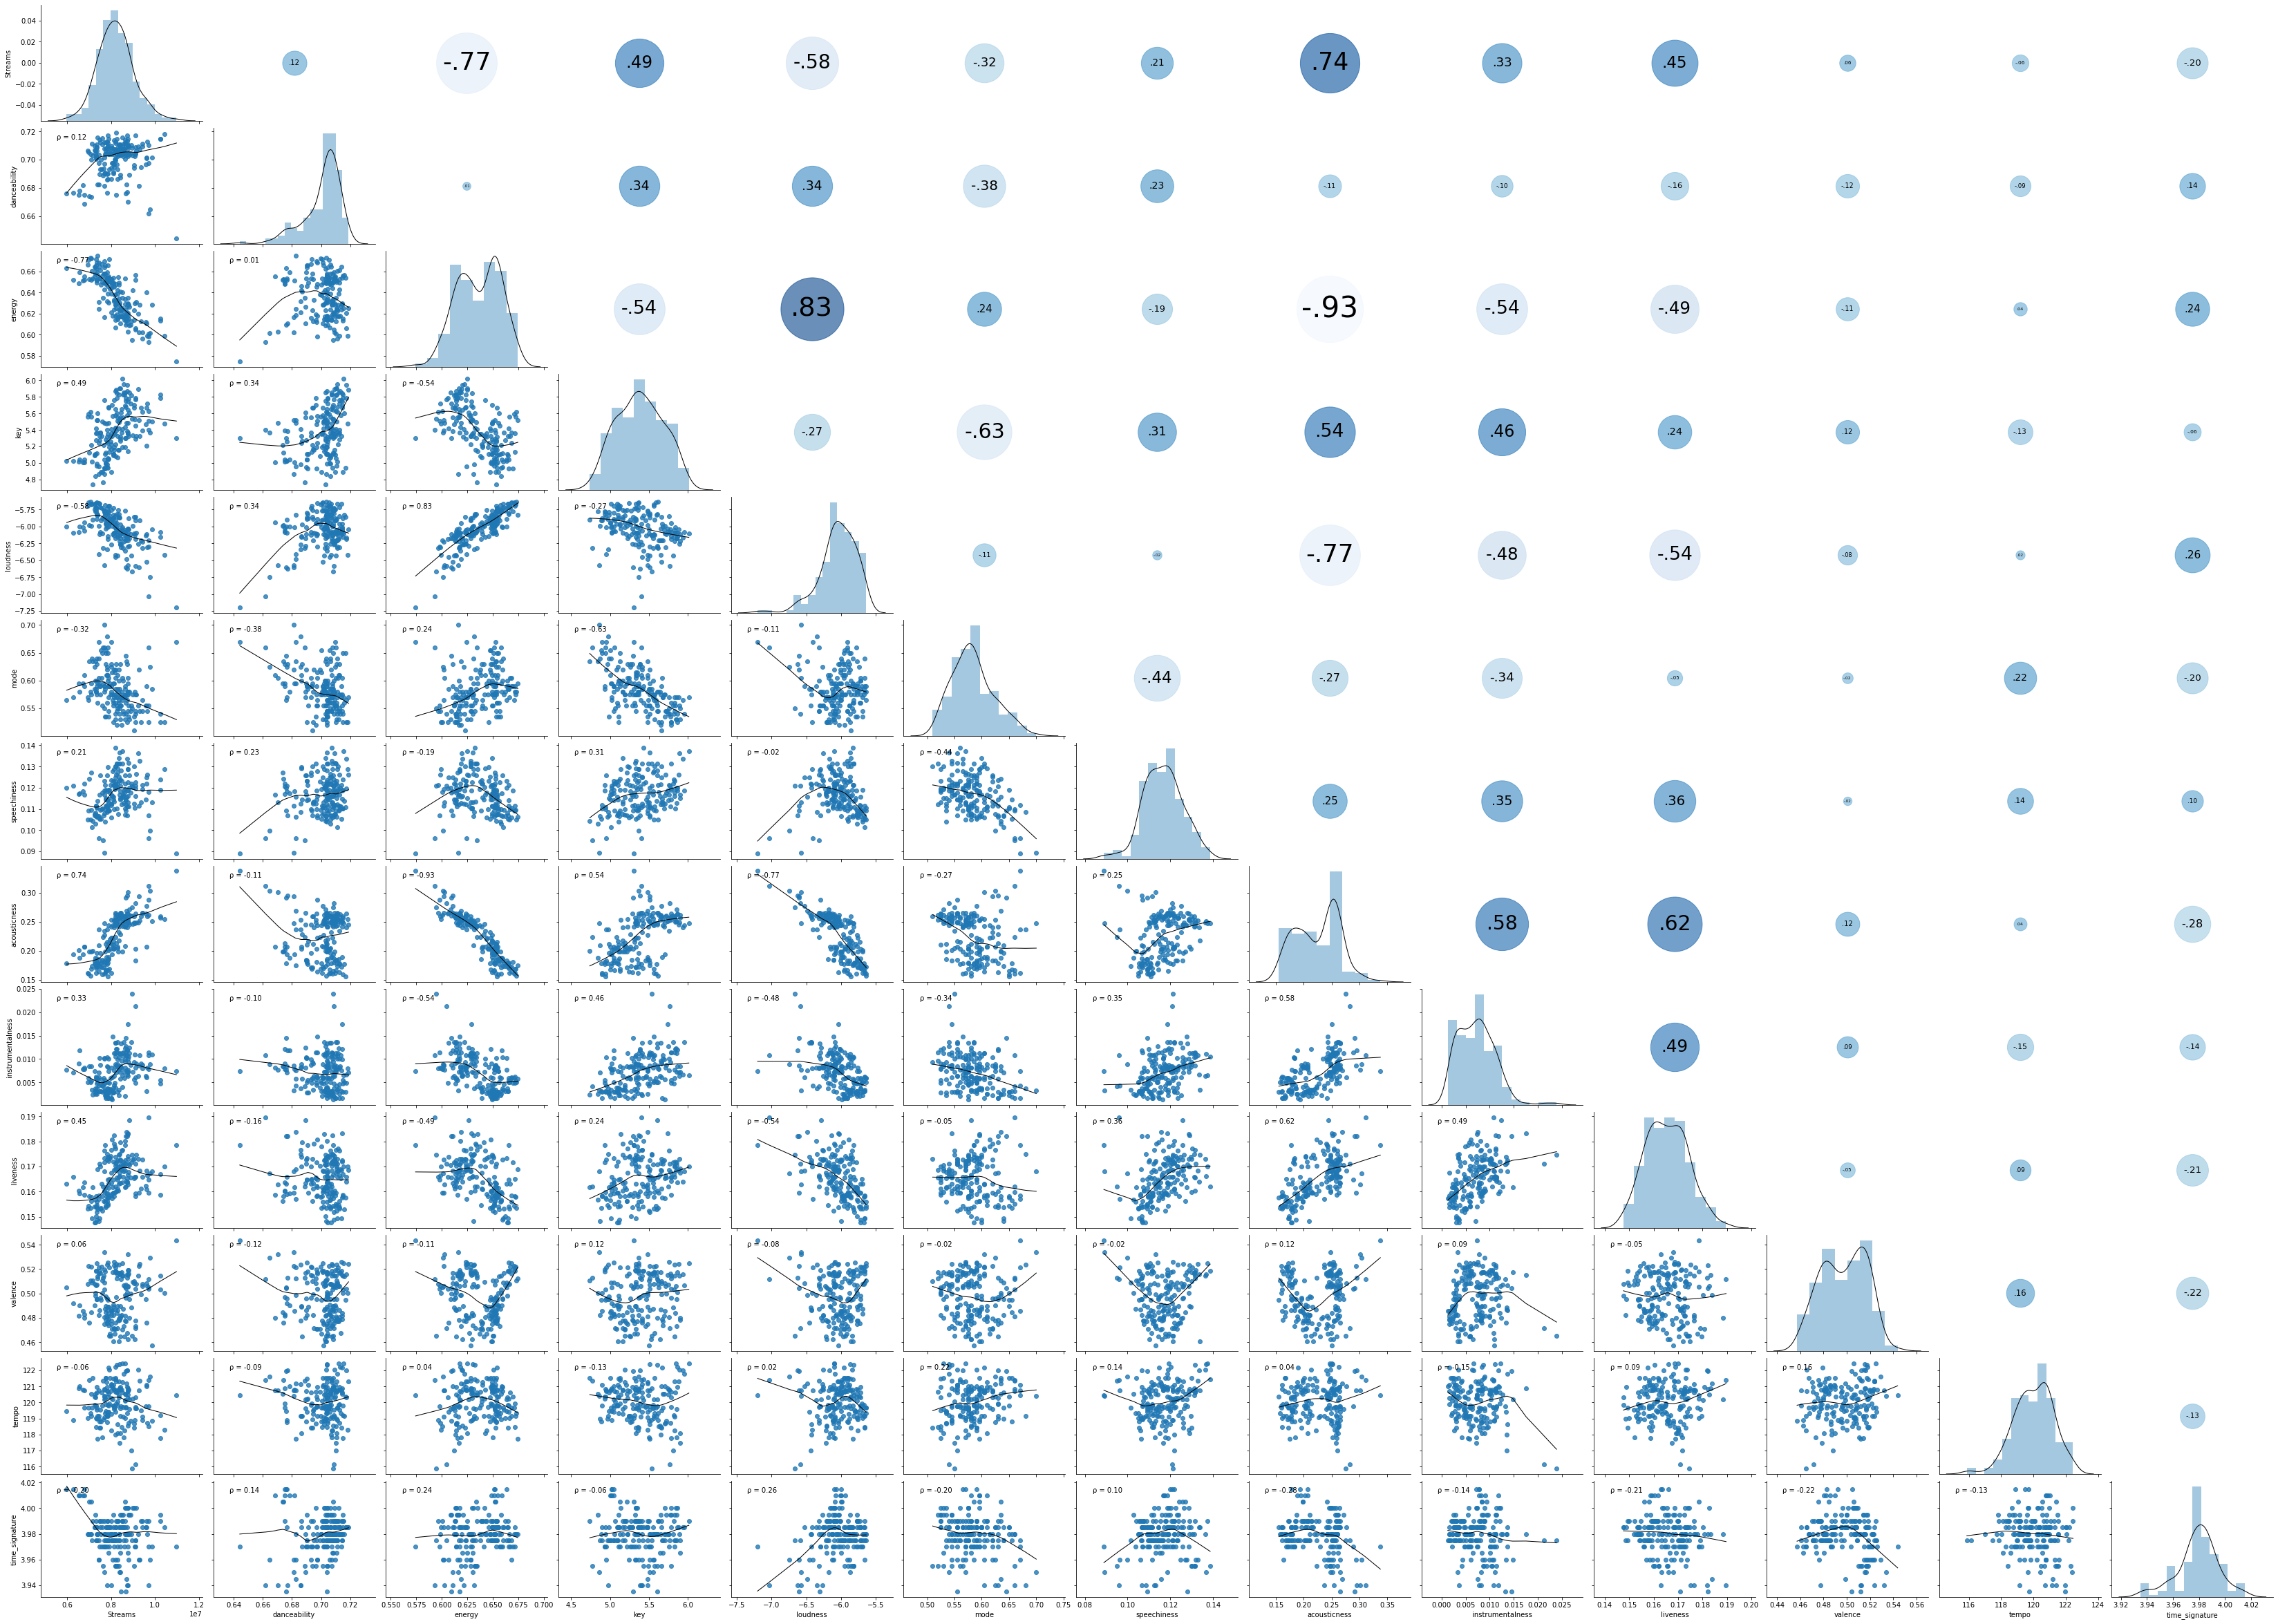

In [139]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="Blues",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)    
    
# g = sns.pairplot(stocks,palette=["Blues_d"])
g = sns.PairGrid(df_relevant, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

Let's try to check if there's any correspondance between the position of the song and the characteristics.

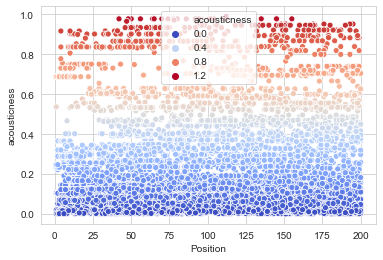

In [30]:
sns.scatterplot(x='Position',y='acousticness',data=df['2020'],hue='acousticness',palette="coolwarm")

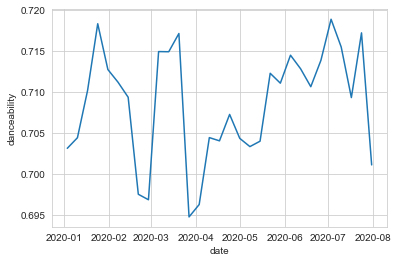

In [35]:
df_grouped = df.groupby(df.index).mean()
sns.lineplot(x=df_grouped['2020'].index,y='danceability',data=df_grouped['2020'],ci=None)

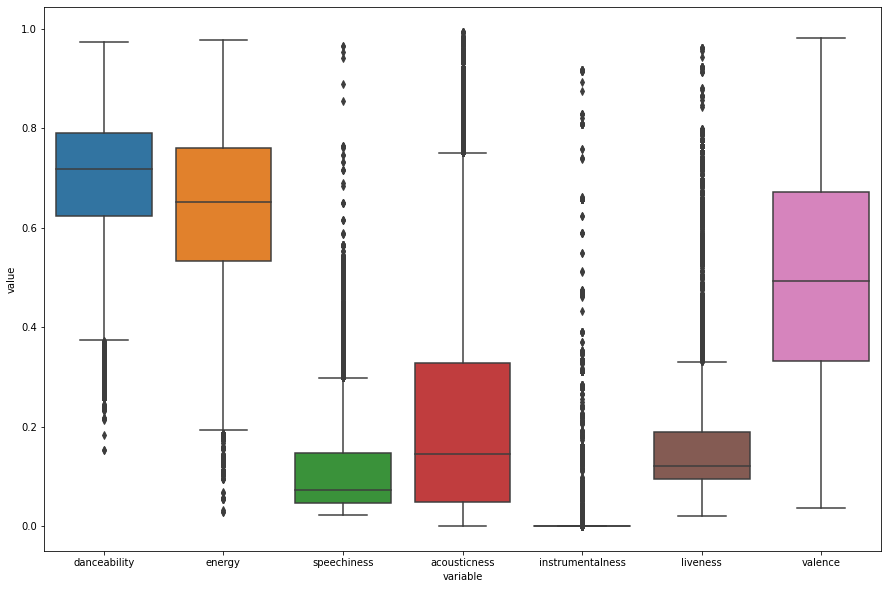

In [6]:
plt.figure(figsize = (15,10))
sns.boxplot(x="variable", y="value", data=pd.melt(df[['danceability','energy','speechiness','acousticness',
                                                              'instrumentalness','liveness','valence']]))
#sns.swarmplot(x="variable", y="value", data=pd.melt(df[['danceability','energy','speechiness','acousticness',
#                                                              'instrumentalness','liveness','valence']]))

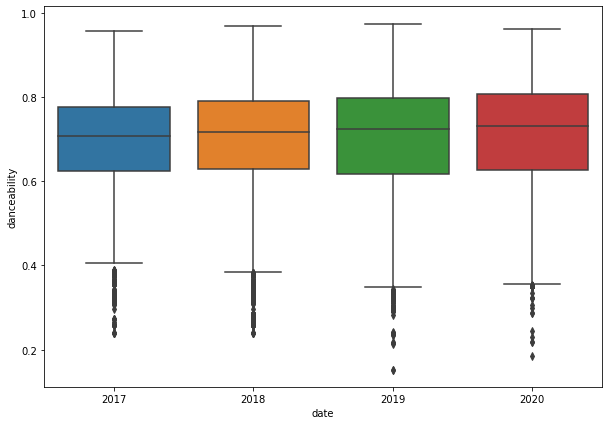

In [7]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df.index.year, y="danceability", data=df)

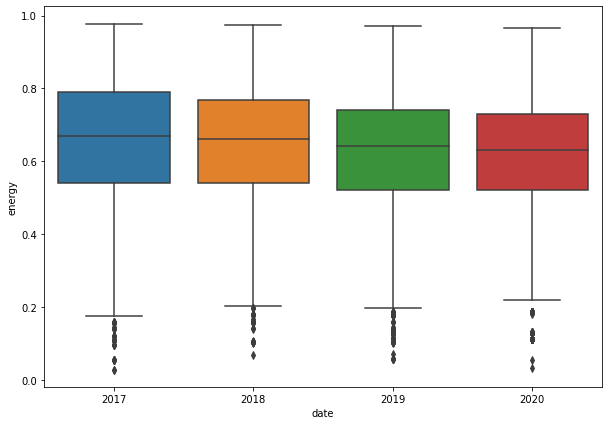

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df.index.year, y="energy", data=df)

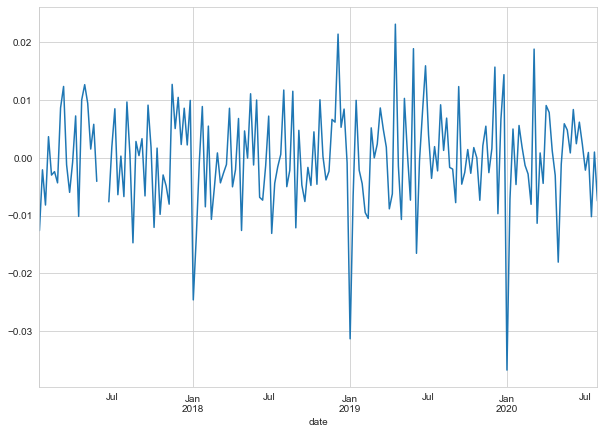

In [22]:
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
diff = df_resampled.valence.diff()
diff = diff[1:]
diff.plot()

As it can be seen, the only relevant correlations are: 
- The negative correlation between `energy` and `acousticness` 
- The correlation between `energy` and `loudness`

[Text(0.5, 0, 'week')]

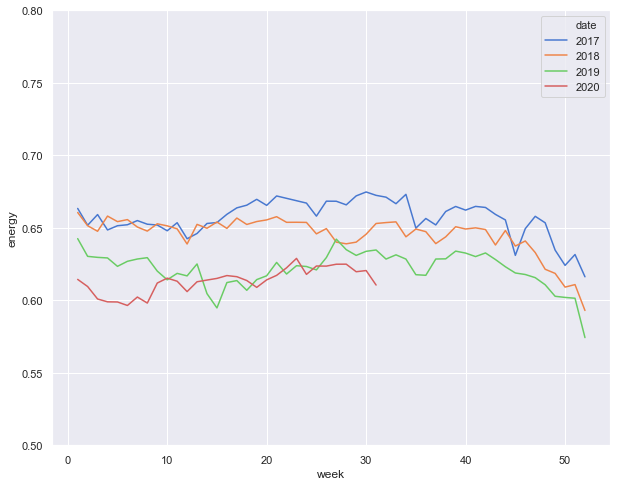

In [214]:
plt.figure(figsize = (10,8))
plt.ylim(0.5,0.8)
sns.set_style("darkgrid")
ax = sns.lineplot(x=df_resampled.index.week, y='energy', hue=df_resampled.index.year, data=df_resampled, ci='sd', palette='muted')
ax.set(xlabel='week')

In [242]:
import plotly.express as px
fig = px.line(df_resampled, x=df_resampled.index.week, y="energy", 
              color=df_resampled.index.year, hover_name=df_resampled.index.year)
fig.update_traces(mode="lines", hovertemplate=None)
fig.update_layout(hovermode="x unified")

fig.show()

In [238]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_resampled.index, y=df_resampled.valence, name='valence', fill='tozeroy')) # fill down to xaxis
fig.add_trace(go.Scatter(x=df_resampled.index, y=df_resampled.energy, name='energy', fill='tonexty')) # fill to trace0 y
fig.add_trace(go.Scatter(x=df_resampled.index, y=df_resampled.danceability, name='danceability', fill='tonexty')) # fill to trace0 y

fig.update_layout(hovermode="x unified")

fig.show()